<a href="https://colab.research.google.com/github/AZFERMIRZA/Customer-Personality-Analysis/blob/main/Customer_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [10]:
!pip intall -q kaggle
from google.colab import files
files.upload()

ERROR: unknown command "intall" - maybe you meant "install"


Saving marketing_campaign.csv to marketing_campaign.csv


{'marketing_campaign.csv': b'\xef\xbb\xbfID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response\r\n5524,1957,Graduation,Single,58138,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1\r\n2174,1954,Graduation,Single,46344,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0\r\n4141,1965,Graduation,Together,71613,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0\r\n6182,1984,Graduation,Together,26646,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0\r\n5324,1981,PhD,Married,58293,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0\r\n7446,1967,Master,Together,62513,0,1,09-09-2013,16,520,42,98,0,42,14,2,6,4,10,6,0,0,0,

In [11]:
!pip install pandas
import pandas as pd
with open('marketing_campaign.csv') as csv_file:
  df = pd.read_csv(csv_file)
df.head()


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [ ]:
#EDA

In [12]:
df.info()#displays information about the DataFrame, such as the number of rows and columns, data types, and memory usage.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [ ]:
df.shape#(ROWS,COLOUMN)


(2240, 29)

In [ ]:
df.nunique()#is a method of the DataFrame that returns the number of unique values for each column in the DataFrame.

ID                     2240
Year_Birth               59
Education                 5
Marital_Status            8
Income                 1974
Kidhome                   3
Teenhome                  3
Dt_Customer             663
Recency                 100
MntWines                776
MntFruits               158
MntMeatProducts         558
MntFishProducts         182
MntSweetProducts        177
MntGoldProds            213
NumDealsPurchases        15
NumWebPurchases          15
NumCatalogPurchases      14
NumStorePurchases        14
NumWebVisitsMonth        16
AcceptedCmp3              2
AcceptedCmp4              2
AcceptedCmp5              2
AcceptedCmp1              2
AcceptedCmp2              2
Complain                  2
Z_CostContact             1
Z_Revenue                 1
Response                  2
dtype: int64

In [ ]:
df.isna().any()# isna-shows all the value of. any()-shows the one unique value boolean

ID                     False
Year_Birth             False
Education              False
Marital_Status         False
Income                  True
Kidhome                False
Teenhome               False
Dt_Customer            False
Recency                False
MntWines               False
MntFruits              False
MntMeatProducts        False
MntFishProducts        False
MntSweetProducts       False
MntGoldProds           False
NumDealsPurchases      False
NumWebPurchases        False
NumCatalogPurchases    False
NumStorePurchases      False
NumWebVisitsMonth      False
AcceptedCmp3           False
AcceptedCmp4           False
AcceptedCmp5           False
AcceptedCmp1           False
AcceptedCmp2           False
Complain               False
Z_CostContact          False
Z_Revenue              False
Response               False
dtype: bool

In [ ]:
df.isnull().any()


ID                     False
Year_Birth             False
Education              False
Marital_Status         False
Income                  True
Kidhome                False
Teenhome               False
Dt_Customer            False
Recency                False
MntWines               False
MntFruits              False
MntMeatProducts        False
MntFishProducts        False
MntSweetProducts       False
MntGoldProds           False
NumDealsPurchases      False
NumWebPurchases        False
NumCatalogPurchases    False
NumStorePurchases      False
NumWebVisitsMonth      False
AcceptedCmp3           False
AcceptedCmp4           False
AcceptedCmp5           False
AcceptedCmp1           False
AcceptedCmp2           False
Complain               False
Z_CostContact          False
Z_Revenue              False
Response               False
dtype: bool

<Axes: >

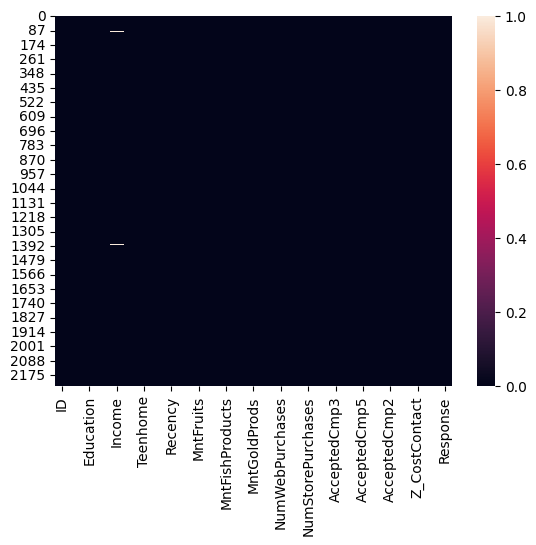

In [ ]:
sns.heatmap(df.isna())

<Axes: >

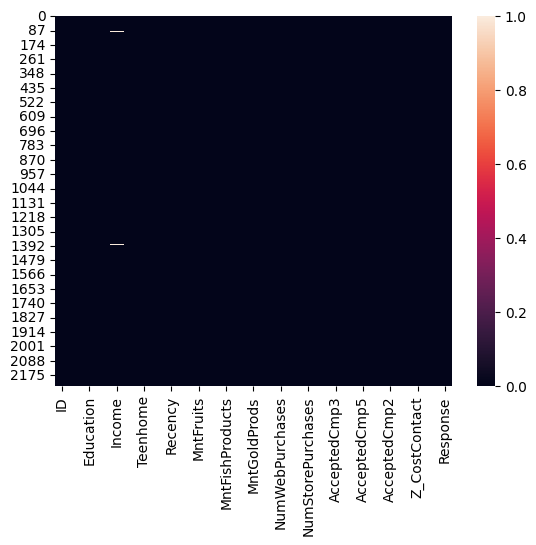

In [ ]:
sns.heatmap(df.isnull())

<Axes: >

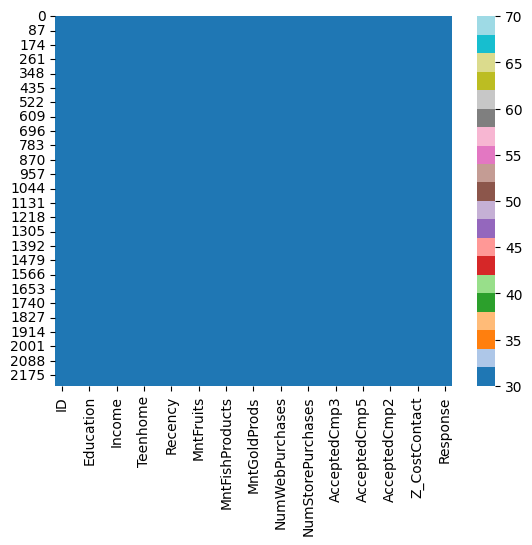

In [ ]:
vmin=30;
vmax=70;


cmap = "tab20"
sns.heatmap(df.isnull(),vmin=vmin,vmax=vmax,cmap=cmap)

In [19]:
df=df.drop(columns=["Z_CostContact", "Z_Revenue"],axis=1)
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age
0,5524,1957,PG,Single,58138.0,0,0,04-09-2012,58,635,...,4,7,0,0,0,0,0,0,1,67
1,2174,1954,PG,Single,46344.0,1,1,08-03-2014,38,11,...,2,5,0,0,0,0,0,0,0,70
2,4141,1965,PG,Together,71613.0,0,0,21-08-2013,26,426,...,10,4,0,0,0,0,0,0,0,59
3,6182,1984,PG,Together,26646.0,1,0,10-02-2014,26,11,...,4,6,0,0,0,0,0,0,0,40
4,5324,1981,PG,Married,58293.0,1,0,19-01-2014,94,173,...,6,5,0,0,0,0,0,0,0,43


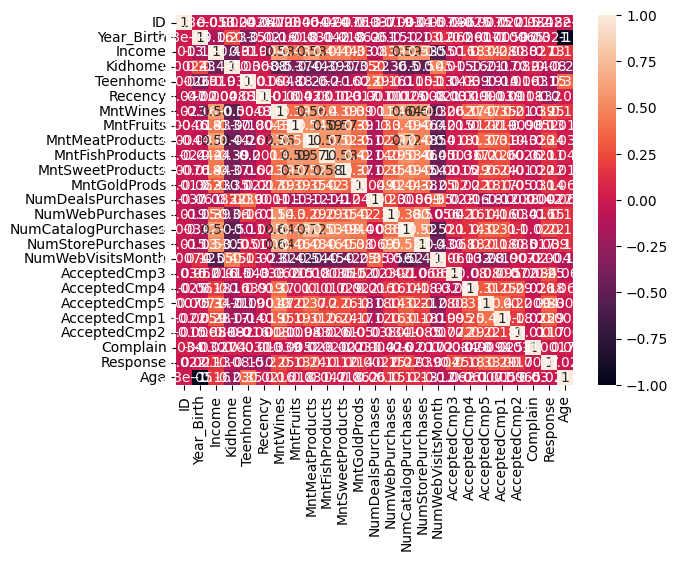

In [20]:
sns.heatmap(df.corr(), annot=True)
plt.show()


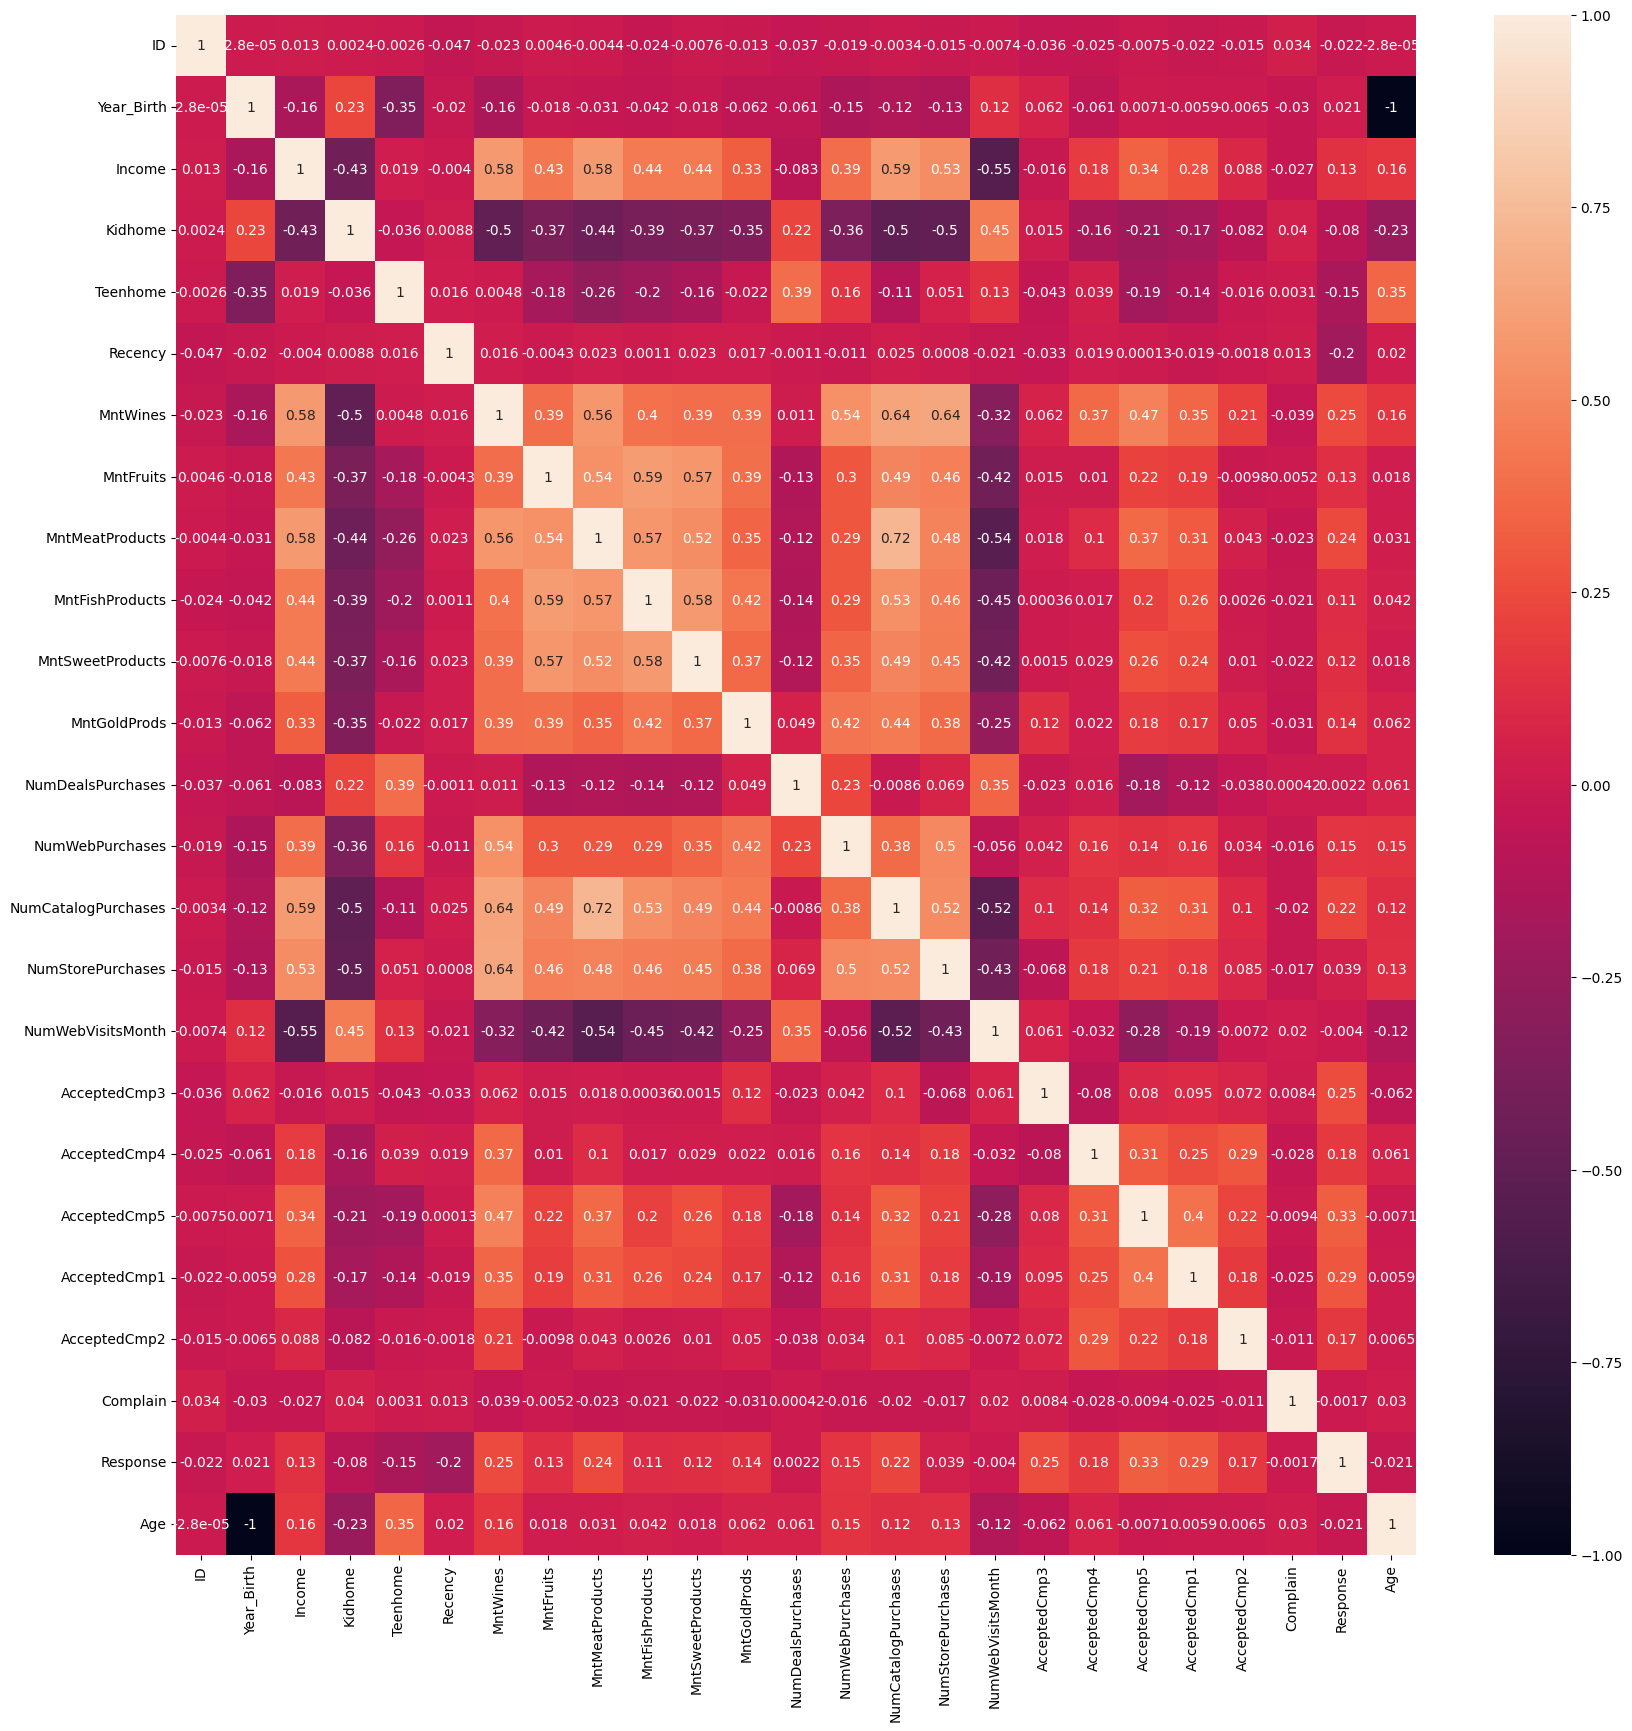

In [21]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), annot=True)
plt.show()

In [22]:
# Calculate the correlation matrix
corr = df.corr()

# Get the absolute values of the correlation coefficients and unstack them
c1 = corr.abs().unstack()

# Sort the correlation coefficients in descending order
c1.sort_values(ascending=True)


ID            Year_Birth      0.000028
Year_Birth    ID              0.000028
Age           ID              0.000028
ID            Age             0.000028
AcceptedCmp5  Recency         0.000129
                                ...   
AcceptedCmp2  AcceptedCmp2    1.000000
MntGoldProds  MntGoldProds    1.000000
Age           Age             1.000000
Year_Birth    Age             1.000000
Age           Year_Birth      1.000000
Length: 625, dtype: float64

In [ ]:
#preprocessing

In [23]:
#calculates the mean of the Income column.
#df['Income'].fillna(income_mean) fills missing values in the Income column with the calculated mean.

df['Income']=df['Income'].fillna(df['Income'].mean())
df.isna().any()

ID                     False
Year_Birth             False
Education              False
Marital_Status         False
Income                 False
Kidhome                False
Teenhome               False
Dt_Customer            False
Recency                False
MntWines               False
MntFruits              False
MntMeatProducts        False
MntFishProducts        False
MntSweetProducts       False
MntGoldProds           False
NumDealsPurchases      False
NumWebPurchases        False
NumCatalogPurchases    False
NumStorePurchases      False
NumWebVisitsMonth      False
AcceptedCmp3           False
AcceptedCmp4           False
AcceptedCmp5           False
AcceptedCmp1           False
AcceptedCmp2           False
Complain               False
Response               False
Age                    False
dtype: bool

In [24]:
df.head()


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age
0,5524,1957,PG,Single,58138.0,0,0,04-09-2012,58,635,...,4,7,0,0,0,0,0,0,1,67
1,2174,1954,PG,Single,46344.0,1,1,08-03-2014,38,11,...,2,5,0,0,0,0,0,0,0,70
2,4141,1965,PG,Together,71613.0,0,0,21-08-2013,26,426,...,10,4,0,0,0,0,0,0,0,59
3,6182,1984,PG,Together,26646.0,1,0,10-02-2014,26,11,...,4,6,0,0,0,0,0,0,0,40
4,5324,1981,PG,Married,58293.0,1,0,19-01-2014,94,173,...,6,5,0,0,0,0,0,0,0,43


In [25]:
df['Marital_Status'].value_counts()

Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64

In [26]:
df['Marital_Status']=df['Marital_Status'].replace(['Married','Together'], 'Relationship')
df['Marital_Status']=df['Marital_Status'].replace(['Divorced','Widow','Alone','Absurd ','YOLO'], 'Single')

In [27]:
df['Marital_Status'].value_counts()

Relationship    1444
Single           794
Absurd             2
Name: Marital_Status, dtype: int64

In [28]:
df['Marital_Status']=df['Marital_Status'].replace(['Absurd'], 'Single')

In [29]:
df['Marital_Status'].value_counts()



Relationship    1444
Single           796
Name: Marital_Status, dtype: int64

In [30]:
df['Kids'] = df['Kidhome'] + df['Teenhome']
df['Expenses'] = df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds']
df['TotalAcceptedCmp'] = df['AcceptedCmp1'] + df['AcceptedCmp2'] + df['AcceptedCmp3'] + df['AcceptedCmp4'] + df['AcceptedCmp5'] + df['Response']
df['NumTotalPurchases'] = df['NumWebPurchases'] + df['NumCatalogPurchases'] + df['NumStorePurchases'] + df['NumDealsPurchases']

In [31]:
df.isna().any()

ID                     False
Year_Birth             False
Education              False
Marital_Status         False
Income                 False
Kidhome                False
Teenhome               False
Dt_Customer            False
Recency                False
MntWines               False
MntFruits              False
MntMeatProducts        False
MntFishProducts        False
MntSweetProducts       False
MntGoldProds           False
NumDealsPurchases      False
NumWebPurchases        False
NumCatalogPurchases    False
NumStorePurchases      False
NumWebVisitsMonth      False
AcceptedCmp3           False
AcceptedCmp4           False
AcceptedCmp5           False
AcceptedCmp1           False
AcceptedCmp2           False
Complain               False
Response               False
Age                    False
Kids                   False
Expenses               False
TotalAcceptedCmp       False
NumTotalPurchases      False
dtype: bool

In [32]:
import pandas as pd
col_del = ["AcceptedCmp1" , "AcceptedCmp2", "AcceptedCmp3" , "AcceptedCmp4",
           "AcceptedCmp5", "Response","NumWebVisitsMonth", "NumWebPurchases",
           "NumCatalogPurchases","NumStorePurchases","NumDealsPurchases" ,
           "Kidhome", "Teenhome","MntWines", "MntFruits", "MntMeatProducts",
           "MntFishProducts", "MntSweetProducts", "MntGoldProds"]
df=df.drop(columns=col_del,axis=1)
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Dt_Customer,Recency,Complain,Age,Kids,Expenses,TotalAcceptedCmp,NumTotalPurchases
0,5524,1957,PG,Single,58138.0,04-09-2012,58,0,67,0,1617,1,25
1,2174,1954,PG,Single,46344.0,08-03-2014,38,0,70,2,27,0,6
2,4141,1965,PG,Relationship,71613.0,21-08-2013,26,0,59,0,776,0,21
3,6182,1984,PG,Relationship,26646.0,10-02-2014,26,0,40,1,53,0,8
4,5324,1981,PG,Relationship,58293.0,19-01-2014,94,0,43,1,422,0,19


In [33]:
df.isna().any()

ID                   False
Year_Birth           False
Education            False
Marital_Status       False
Income               False
Dt_Customer          False
Recency              False
Complain             False
Age                  False
Kids                 False
Expenses             False
TotalAcceptedCmp     False
NumTotalPurchases    False
dtype: bool

In [34]:
df['Age'] = 2024 - df["Year_Birth"]


In [35]:
df['Education'].value_counts()

PG    2186
UG      54
Name: Education, dtype: int64

In [36]:
df['Education'] = df['Education'].replace(['Graduation','PhD','Master','2n Cycle'],'PG')
df['Education'] = df['Education'].replace(['Basic'],'UG')

In [37]:
df['Education'].value_counts()


PG    2186
UG      54
Name: Education, dtype: int64

In [38]:
df.isna().any()


ID                   False
Year_Birth           False
Education            False
Marital_Status       False
Income               False
Dt_Customer          False
Recency              False
Complain             False
Age                  False
Kids                 False
Expenses             False
TotalAcceptedCmp     False
NumTotalPurchases    False
dtype: bool

In [39]:
df['Dt_Customer'] = pd.to_datetime(df.Dt_Customer)

In [40]:
df['first_day'] = '01-01-2015'
df['first_day'] = pd.to_datetime(df.first_day)
df['day_engaged'] = (df['first_day'] - df['Dt_Customer']).dt.days


In [41]:
df=df.drop(columns=["ID", "Dt_Customer", "first_day", "Year_Birth", "Dt_Customer", "Recency", "Complain"],axis=1)
df.shape


(2240, 9)

In [42]:
df.isna().any()


Education            False
Marital_Status       False
Income               False
Age                  False
Kids                 False
Expenses             False
TotalAcceptedCmp     False
NumTotalPurchases    False
day_engaged          False
dtype: bool

In [43]:
#visualizations

In [50]:
fig = px.bar( df, x='Marital_Status', y='Expenses', color="Education")
fig.show()

In [51]:
fig = px.bar( df,  x='Marital_Status', y='Expenses', color="Marital_Status")
fig.show()

In [52]:
#Less number of single customer

In [53]:
df.isna().any()

Education            False
Marital_Status       False
Income               False
Age                  False
Kids                 False
Expenses             False
TotalAcceptedCmp     False
NumTotalPurchases    False
day_engaged          False
dtype: bool

In [55]:
fig = px.histogram(df,x='Expenses', template = 'plotly_dark', facet_row='Marital_Status')
fig.show()

In [58]:
fig = px.histogram (df, x = "Expenses",  facet_row = "Education",  template = 'plotly_dark')
fig.show ()

In [59]:
fig = px.histogram (df, x = "NumTotalPurchases",  facet_row = "Education",  template = 'plotly_dark')
fig.show ()

In [60]:
fig = px.histogram (df, x = "Age",  facet_row = "Marital_Status",  template = 'plotly_dark')
fig.show ()

In [61]:
fig = px.histogram (df, x = "Income",  facet_row = "Marital_Status",  template = 'plotly_dark')
fig.show ()

In [64]:
fig = px.pie( df, names="Marital_Status", hole= 0.4 , template = "gridon")
fig.show()

In [65]:
fig =  px.pie (df, names = "Education", hole = 0.4, template = "plotly_dark")
fig.show ()

In [66]:
fig =  px.pie (df, names = "Marital_Status", hole = 0.4, template = "gridon")
fig.show ()

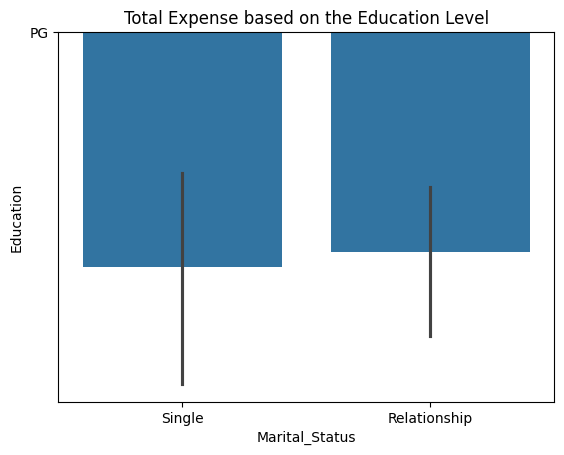

In [67]:
sns.barplot(x=df['Marital_Status'],y=df['Education']);
plt.title('Total Expense based on the Education Level');

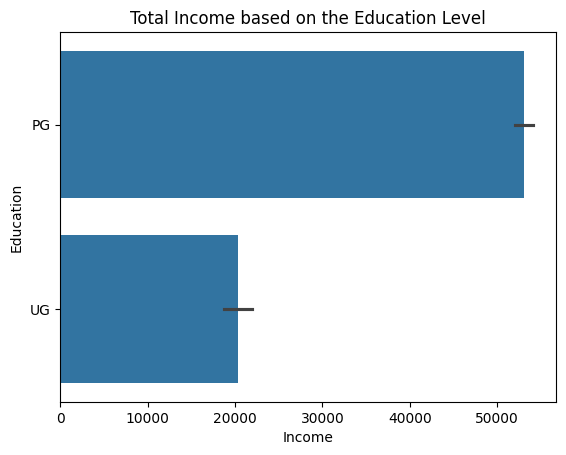

In [68]:
sns.barplot(x = df['Income'],y = df['Education']);
plt.title('Total Income based on the Education Level');


In [69]:
df.describe()

,Income,Age,Kids,Expenses,TotalAcceptedCmp,NumTotalPurchases,day_engaged
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,52247.251354,55.194196,0.950446,605.798214,0.446875,14.862054,538.043304
std,25037.797168,11.984069,0.751803,602.249288,0.890543,7.677173,232.229893
min,1730.000000,28.000000,0.000000,5.000000,0.000000,0.000000,26.000000
25%,35538.750000,47.000000,0.000000,68.750000,0.000000,8.000000,366.750000
50%,51741.500000,54.000000,1.000000,396.000000,0.000000,15.000000,539.000000
75%,68289.750000,65.000000,1.000000,1045.500000,1.000000,21.000000,711.250000
max,666666.000000,131.000000,3.000000,2525.000000,5.000000,44.000000,1089.000000


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [70]:
df.isna().any()

Education            False
Marital_Status       False
Income               False
Age                  False
Kids                 False
Expenses             False
TotalAcceptedCmp     False
NumTotalPurchases    False
day_engaged          False
dtype: bool

<Axes: >

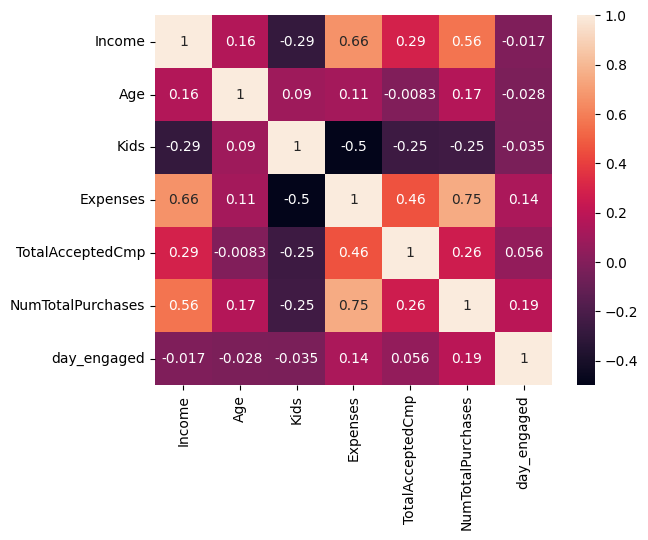

In [72]:
sns.heatmap(df.corr(), annot=True)